I compared the ICRF3 (S/X) catalog with the ICRF2 catalog.

In [1]:
from astropy.table import Table, join, Column
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = "svg"

# My modules
from my_progs.catalog.vsh_deg1_cor import vsh_deg01_fitting
from my_progs.catalog.vsh_deg2_cor import vsh_deg02_fitting, residual_calc02
from my_progs.catalog.pos_diff import nor_sep, pos_diff_calc
from my_progs.catalog.pos_err import pos_err_calc
from my_progs.catalog.write_output import print_vsh1_corr, print_vsh2_corr
from my_progs.catalog.read_icrf import read_icrf2, read_icrf3

Read the position information from two catalogs.

In [2]:
# Read ICRF3 S/X catalog
icrf3sx = read_icrf3(wv="sx")
icrf3sx

icrf_name,iers_name,type,ra,dec,ra_err,dec_err,ra_dec_corr,mean_obs,pos_err,beg_obs,end_obs,nb_sess,nb_del
,,,deg,deg,mas,mas,,,,,,,
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
J000020.3-322101,2357-326,--,0.08499990025,-32.350342705972224,0.1018819152558419,0.26239999999999997,-0.0602,56559.8,0.26248432591237514,52306.7,57776.0,4,237
J000027.0+030715,2357+028,--,0.11259380737499998,3.1210128779444446,0.8883304445189708,0.34209999999999996,-0.0119,57974.7,0.8883413965937612,57974.7,57974.7,1,28
J000053.0+405401,2358+406,--,0.22117109666666665,40.900502681055556,0.170519246717052,0.26699999999999996,-0.1654,56460.2,0.26942932367783917,50242.8,57809.9,3,152
J000105.3-155107,2358-161,--,0.27220306162499996,-15.851965341722222,0.10129550931840807,0.22609999999999997,-0.2106,56338.4,0.22733864770189094,50632.3,58137.6,4,316
J000107.0+605122,2358+605,--,0.2795825644583333,60.85633280208334,0.24676349421345134,0.19479999999999997,0.1619,57160.2,0.2515606941056636,52306.7,57836.8,3,172
J000108.6+191433,2358+189,--,0.2859231923333333,19.242722698222224,0.03682110462165689,0.0472,-0.0314,55771.9,0.04723602208620724,50085.5,58205.8,168,3584
J000211.9-215309,2359-221,--,0.5499226089166666,-21.886073762777777,0.1855389805384662,0.46729999999999994,-0.3427,57436.5,0.47228145572921587,54818.7,57901.9,3,103
J000315.9-194150,0000-199,--,0.8164558497083333,-19.697333834694444,0.1321846666876117,0.29719999999999996,-0.1961,57450.5,0.29858965139408694,54088.1,58137.6,4,251


In [3]:
# Read ICRF2 data
icrf2 = read_icrf2()
icrf2

icrf_name,ivs_name,iers_name,ra,dec,type,ra_err,dec_err,ra_dec_corr,pos_err,mean_obs,beg_obs,end_obs,nb_sess,nb_del
,,,deg,deg,,mas,mas,,mas,,,,,
str16,str8,str8,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,int64,int64
J000020.3-322101,2357-326,2357-326,0.08499978154166665,-32.35034264325,V,0.4228606361249806,0.9246,-0.004,0.9246019563265486,52306.7,52306.7,52306.7,1,40
J000053.0+405401,2358+406,2358+406,0.2211731990833333,40.90049807775,V,1.7733322629796062,2.0936,-0.164,2.1522926501977038,50242.8,50242.8,50242.8,1,22
J000105.3-155107,2358-161,2358-161,0.27220320083333327,-15.851965569361111,V,0.4592928857503561,0.8910999999999999,-0.749,0.9620600872877471,50632.3,50632.3,50632.3,1,58
J000107.0+605122,2358+605,2358+605,0.27958165691666664,60.85633416630556,V,2.3293508596752726,3.5917999999999997,-0.102,3.6051651029612515,52306.7,52306.7,52306.7,1,11
J000108.6+191433,2358+189,2358+189,0.28592319541666666,19.242722705277778,N,0.06939362024552428,0.0984,0.08,0.09870723270272877,53306.0,50085.5,54907.7,21,716
J000211.9-215309,2359-221,2359-221,0.5499276015,-21.88606554838889,N,16.062415294281355,38.6714,0.971,41.72301021726925,54818.7,54818.7,54818.7,1,3
J000315.9-194150,0000-199,0000-199,0.8164555134166667,-19.697332749361113,V,4.6366314167931675,13.643499999999998,-0.943,14.33480339351269,54088.1,54088.1,54088.1,1,11
J000318.6-192722,0000-197,0000-197,0.8278126013333333,-19.456209681833332,V,0.4859687733303084,0.9445999999999999,-0.224,0.9528939533621429,50650.0,50632.3,50688.3,2,76


A crossmatch is performed to obtain a sample of 3410 common sources.

In [4]:
com_sou = join(icrf3sx, icrf2, keys="iers_name", table_names=["icrf3sx", "icrf2"])
com_sou

icrf_name_icrf3sx,iers_name,type_icrf3sx,ra_icrf3sx,dec_icrf3sx,ra_err_icrf3sx,dec_err_icrf3sx,ra_dec_corr_icrf3sx,mean_obs_icrf3sx,pos_err_icrf3sx,beg_obs_icrf3sx,end_obs_icrf3sx,nb_sess_icrf3sx,nb_del_icrf3sx,icrf_name_icrf2,ivs_name,ra_icrf2,dec_icrf2,type_icrf2,ra_err_icrf2,dec_err_icrf2,ra_dec_corr_icrf2,pos_err_icrf2,mean_obs_icrf2,beg_obs_icrf2,end_obs_icrf2,nb_sess_icrf2,nb_del_icrf2
,,,deg,deg,mas,mas,,,,,,,,,,deg,deg,,mas,mas,,mas,,,,,
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str16,str8,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,int64,int64
J000319.3+212944,0000+212,--,0.8306250248333333,21.495696754555556,0.09211406408089429,0.17349999999999996,-0.1114,55896.9,0.17391922837114265,50085.5,57901.9,4,297,J000319.3+212944,0000+212,0.83062514625,21.49569653825,V,0.5960896489006478,1.2524999999999997,-0.474,1.2901253012295735,50123.1,50085.5,50156.3,2,66
J000318.6-192722,0000-197,--,0.8278126181249998,-19.456209925444444,0.2043727812594762,0.4265,-0.043,55829.0,0.4266174244028753,50632.3,58137.6,5,296,J000318.6-192722,0000-197,0.8278126013333333,-19.456209681833332,V,0.4859687733303084,0.9445999999999999,-0.224,0.9528939533621429,50650.0,50632.3,50688.3,2,76
J000315.9-194150,0000-199,--,0.8164558497083333,-19.697333834694444,0.1321846666876117,0.29719999999999996,-0.1961,57450.5,0.29858965139408694,54088.1,58137.6,4,251,J000315.9-194150,0000-199,0.8164555134166667,-19.697332749361113,V,4.6366314167931675,13.643499999999998,-0.943,14.33480339351269,54088.1,54088.1,54088.1,1,11
J000416.1+461517,0001+459,--,1.0671985290416666,46.254991851444444,0.11585246722802883,0.14079999999999998,0.0152,55487.8,0.1408340404339771,50306.3,57836.8,3,273,J000416.1+461517,0001+459,1.0671985645,46.254991665472225,V,0.31664958249475456,0.6327999999999999,0.096,0.6337693172688701,50306.3,50306.3,50306.3,1,75
J000404.9-114858,0001-120,--,1.0204791709583332,-11.81621839238889,0.07282342412197838,0.14839999999999998,-0.0974,55476.6,0.14862223343295053,50576.2,58144.4,5,307,J000404.9-114858,0001-120,1.0204791624583331,-11.816218260277779,V,0.1286155636323102,0.27809999999999996,-0.072,0.27829570699166345,51045.0,50576.2,53134.5,3,109
J000520.2+052410,0002+051,--,1.3342312922499997,5.403000997444445,0.16441624418151832,0.31449999999999995,-0.059,56409.9,0.3147054323091073,49914.7,57951.4,3,187,J000520.2+052410,0002+051,1.334231308083333,5.4030002428333335,V,2.0590110604892575,2.1965,-0.105,2.2560632855384,49914.7,49914.7,49914.7,1,26
J000435.7+201942,0002+200,--,1.1489928565416665,20.32842159,0.08973949026528143,0.14179999999999998,-0.0807,55620.3,0.1421059430147993,52409.7,57901.9,4,237,J000435.7+201942,0002+200,1.1489929137916663,20.328421525527776,N,0.20170286691858957,0.24259999999999995,0.079,0.24421911780066,52600.4,52409.7,52983.7,3,102
J000504.3+542824,0002+541,--,1.2681806087916665,54.47359013780556,0.09605221846642922,0.10749999999999998,-0.0918,55527.4,0.1090556354174522,49577.0,57840.3,4,269,J000504.3+542824,0002+541,1.2681810385416665,54.47359068861111,V,0.7491549969176401,1.1304999999999998,0.452,1.2016770811288238,49577.0,49577.0,49577.0,1,60


It means that there are four ICRF2 sources missing in the ICRF3 catalog.

Possibly, they are some gravition lens mirrors? (Check them in the opa2019a or in RFC catalog)

In [5]:
from astropy.table import setdiff

miss_sou = setdiff(icrf2, com_sou, keys="iers_name")
miss_sou

icrf_name,ivs_name,iers_name,ra,dec,type,ra_err,dec_err,ra_dec_corr,pos_err,mean_obs,beg_obs,end_obs,nb_sess,nb_del
,,,deg,deg,,mas,mas,,mas,,,,,
str16,str8,str8,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,int64,int64
J013435.6-093102,0132-097,0132-097,23.64861091858333,-9.517466325305556,N,1.3034578073139413,1.8081999999999998,0.725,2.0892262941344555,53702.2,52409.7,54440.7,2,22
J083520.6-451035,VELA,0833-450,128.8360625325,-45.17643188619444,V,18.387149477237916,11.3591,-0.408,19.194298859955556,48132.8,48043.8,48162.4,2,4
J095524.7+690113,SN1993J,0951+692,148.8532281770833,69.02047292925,N,0.5008005326486705,0.5898,0.117,0.5990918679873217,49238.5,49225.8,49267.8,3,97
J160140.5+431646,1600+43B,1600+431,240.41881422516664,43.27957705586111,N,1.6963528072039193,3.4735999999999994,0.471,3.583172690554559,50053.0,49883.8,50560.6,2,4


To see how many so-called ICRF2 defining sources are still kept in the ICRF3 defining source list.

In [6]:
mask0 = (com_sou["type_icrf3sx"] == "D") & (com_sou["type_icrf2"] == "D")
N0 = len(com_sou[mask0])

mask1 = (com_sou["type_icrf3sx"] != "D") & (com_sou["type_icrf2"] == "D")
N1 = len(com_sou[mask1])

mask2_1 = (com_sou["type_icrf3sx"] == "D") & (com_sou["type_icrf2"] == "V")
N2_1 = len(com_sou[mask2_1])

mask2_2 = (com_sou["type_icrf3sx"] == "D") & (com_sou["type_icrf2"] == "N")
N2_2 = len(com_sou[mask2_2])

mask2 = (com_sou["type_icrf3sx"] == "D") & (com_sou["type_icrf2"] != "D")
N2 = len(com_sou[mask2])

mask3 = (com_sou["type_icrf3sx"] != "D") & (com_sou["type_icrf2"] != "D")
N3 = len(com_sou[mask3])

N0, N1, N2_1, N2_2, N3, N0 / 295.

(165, 130, 22, 109, 2984, 0.559322033898305)

Only 56% ICRF2 defining sources still remain in the defining source list.
This means that 130 among the ICRF2 defining sources are found or considered to be unstable.
And there are also 131 sources entering the defining source list that were considered not suitable for defining the celestial reference frame, among which 22 are VCS sources (maybe observed in RDV sessions) and 109 non-VCS sources.

In [7]:
# Seperate the sources into the four catagories: 
# A (defining sources in both catalogs)
com_souA = com_sou[mask0]

# B (defining sources in ICRF3 but not in ICRF2)
com_souB = com_sou[mask1]

# C (defining sources in ICRF2 but not in ICRF3)
com_souC = com_sou[mask2]

# D (non-defining sources in both catalogs)
com_souD = com_sou[mask3]

Plot the sky dostribution of these sources.

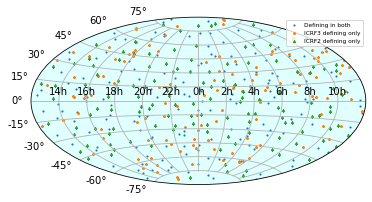

In [8]:
# Transform the coordinate into an astropy.coordinate.SkyCoord object
# A
coord_A = SkyCoord(ra=com_souA["ra_icrf3sx"], dec=com_souA["dec_icrf3sx"])
# The mid-point of skyplot will be 0
ra_rad_A = coord_A.ra.wrap_at(180 * u.deg).radian
dec_rad_A = coord_A.dec.radian

# B
coord_B = SkyCoord(ra=com_souB["ra_icrf3sx"], dec=com_souB["dec_icrf3sx"])
# The mid-point of skyplot will be 0
ra_rad_B = coord_B.ra.wrap_at(180 * u.deg).radian
dec_rad_B = coord_B.dec.radian

# C
coord_C = SkyCoord(ra=com_souC["ra_icrf3sx"], dec=com_souC["dec_icrf3sx"])
# The mid-point of skyplot will be 0
ra_rad_C = coord_C.ra.wrap_at(180 * u.deg).radian
dec_rad_C = coord_C.dec.radian

# D
coord_D = SkyCoord(ra=com_souD["ra_icrf3sx"], dec=com_souD["dec_icrf3sx"])
# The mid-point of skyplot will be 0
ra_rad_D = coord_D.ra.wrap_at(180 * u.deg).radian
dec_rad_D = coord_D.dec.radian


ax = plt.subplot(111, projection="aitoff", facecolor="lightcyan")
# plt.title("Distribution of ", y=1.08)
ax.scatter(ra_rad_A, dec_rad_A, marker=".", s=5, label="Defining in both")
ax.scatter(ra_rad_B, dec_rad_B, marker="*", s=5, label="ICRF3 defining only")
ax.scatter(ra_rad_C, dec_rad_C, marker="^", s=5, label="ICRF2 defining only")
# ax.scatter(ra_rad_D, dec_rad_D, marker="v", s=1, label="D")

pi = np.pi
ax.set_xticks(np.arange(-5./6 * pi, pi, pi/6))
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h",
                     "0h", "2h", "4h", "6h", "8h", "10h"])

ax.legend(loc="upper right", fontsize="xx-small")
ax.grid(True)

plt.savefig("/Users/Neo/Desktop/def_sou.png")

Next step is to calculate the positional offset (ICRF2 - ICRF3SX).

In [9]:
[dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov,
 ang_sep, X_a, X_d, X] = pos_diff_calc(
    com_sou["ra_icrf2"], com_sou["ra_err_icrf2"], 
    com_sou["dec_icrf2"], com_sou["dec_err_icrf2"], com_sou["ra_dec_corr_icrf2"],
    com_sou["ra_icrf3sx"], com_sou["ra_err_icrf3sx"], 
    com_sou["dec_icrf3sx"], com_sou["dec_err_icrf3sx"], com_sou["ra_dec_corr_icrf3sx"])

com_sou.add_columns([dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov, ang_sep, X_a, X_d, X],
                    names=["dra", "ddec", "dra_err", "ddec_err", "dra_ddec_cov",
                           "ang_sep", "nor_dra",  "nor_ddec", "nor_sep"])

com_sou["dra"].unit = u.mas
com_sou["ddec"].unit = u.mas
com_sou["dra_err"].unit = u.mas

com_sou

icrf_name_icrf3sx,iers_name,type_icrf3sx,ra_icrf3sx,dec_icrf3sx,ra_err_icrf3sx,dec_err_icrf3sx,ra_dec_corr_icrf3sx,mean_obs_icrf3sx,pos_err_icrf3sx,beg_obs_icrf3sx,end_obs_icrf3sx,nb_sess_icrf3sx,nb_del_icrf3sx,icrf_name_icrf2,ivs_name,ra_icrf2,dec_icrf2,type_icrf2,ra_err_icrf2,dec_err_icrf2,ra_dec_corr_icrf2,pos_err_icrf2,mean_obs_icrf2,beg_obs_icrf2,end_obs_icrf2,nb_sess_icrf2,nb_del_icrf2,dra,ddec,dra_err,ddec_err,dra_ddec_cov,ang_sep,nor_dra,nor_ddec,nor_sep
,,,deg,deg,mas,mas,,,,,,,,,,deg,deg,,mas,mas,,mas,,,,,,mas,mas,mas,mas,mas,deg,deg,deg,deg
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str16,str8,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J000319.3+212944,0000+212,--,0.8306250248333333,21.495696754555556,0.09211406408089429,0.17349999999999996,-0.1114,55896.9,0.17391922837114265,50085.5,57901.9,4,297,J000319.3+212944,0000+212,0.83062514625,21.49569653825,V,0.5960896489006478,1.2524999999999997,-0.474,1.2901253012295735,50123.1,50085.5,50156.3,2,66,0.40669755000736907,-0.7786999972836384,0.6031648782281646,1.264459766066125,-0.35566985462673006,0.878508157589635,0.6742725988987773,-0.6158361208330579,0.7554647074256818
J000318.6-192722,0000-197,--,0.8278126181249998,-19.456209925444444,0.2043727812594762,0.4265,-0.043,55829.0,0.4266174244028753,50632.3,58137.6,5,296,J000318.6-192722,0000-197,0.8278126013333333,-19.456209681833332,V,0.4859687733303084,0.9445999999999999,-0.224,0.9528939533621429,50650.0,50632.3,50688.3,2,76,-0.056998083157189634,0.8770000022195745,0.5271943497154521,1.0364224090591634,-0.10657442175837743,0.8788502633422417,-0.10811588399601359,0.8461800850250737,0.8481686743015533
J000315.9-194150,0000-199,--,0.8164558497083333,-19.697333834694444,0.1321846666876117,0.29719999999999996,-0.1961,57450.5,0.29858965139408694,54088.1,58137.6,4,251,J000315.9-194150,0000-199,0.8164555134166667,-19.697332749361113,V,4.6366314167931675,13.643499999999998,-0.943,14.33480339351269,54088.1,54088.1,54088.1,1,11,-1.1398103118998917,3.9071999907491772,4.638515245345296,13.646736609534162,-59.66177137710601,4.070058883459022,-0.24572740448437244,0.2863102075275234,0.2952717153251521
J000416.1+461517,0001+459,--,1.0671985290416666,46.254991851444444,0.11585246722802883,0.14079999999999998,0.0152,55487.8,0.1408340404339771,50306.3,57836.8,3,273,J000416.1+461517,0001+459,1.0671985645,46.254991665472225,V,0.31664958249475456,0.6327999999999999,0.096,0.6337693172688701,50306.3,50306.3,50306.3,1,75,0.08826360794699009,-0.6694999882483899,0.3371776271595194,0.6482750033743395,0.019484024973320083,0.675293046574903,0.26177184023313743,-1.0327407115245413,1.0921310324588362
J000404.9-114858,0001-120,--,1.0204791709583332,-11.81621839238889,0.07282342412197838,0.14839999999999998,-0.0974,55476.6,0.14862223343295053,50576.2,58144.4,5,307,J000404.9-114858,0001-120,1.0204791624583331,-11.816218260277779,V,0.1286155636323102,0.27809999999999996,-0.072,0.27829570699166345,51045.0,50576.2,53134.5,3,109,-0.029951569743942624,0.4756000009820127,0.14780126626421836,0.31521765496240844,-0.0036278965777294075,0.4765421885460056,-0.20264758551120537,1.5087987411070958,1.5112146944893852
J000520.2+052410,0002+051,--,1.3342312922499997,5.403000997444445,0.16441624418151832,0.31449999999999995,-0.059,56409.9,0.3147054323091073,49914.7,57951.4,3,187,J000520.2+052410,0002+051,1.334231308083333,5.4030002428333335,V,2.0590110604892575,2.1965,-0.105,2.2560632855384,49914.7,49914.7,49914.7,1,26,0.056746750934747306,-2.71660000095153,2.065565116031894,2.2189011920317676,-0.47792569402719887,2.717192624550476,0.027472748495947722,-1.2242996717055425,1.2284374184433218
J000435.7+201942,0002+200,--,1.1489928565416665,20.32842159,0.08973949026528143,0.14179999999999998,-0.0807,55620.3,0.1421059430147993,52409.7,57901.9,4,237,J000435.7+201942,0002+200,1.1489929137916663,20.3284215255

In [10]:
# Seperate the sources into the "defining sources" and "other sources".
# Defining sources
mask_def = (com_sou["type_icrf3sx"] == "D")
# mask_def = (com_sou["type_icrf2"] == "D")
com_def = com_sou[mask_def]

# Other sources
mask_oth = (com_sou["type_icrf3sx"] != "D")
# mask_oth = (com_sou["type_icrf2"] != "D")
com_oth = com_sou[mask_oth]

Several plots related to the positional difference.

The standard deviation of differences is: 
R.A.  39.34564162825388
Decl. 69.23009516678418


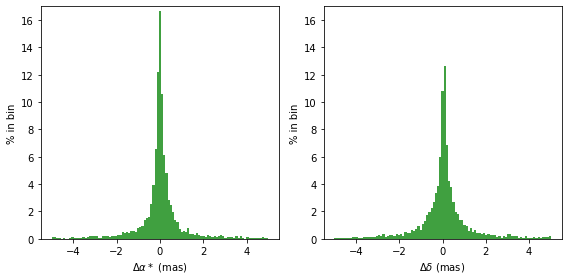

In [11]:
# Calculate the stadard deviation of the difference
std_ra = np.std(dRA)
std_dec = np.std(dDC)

print("The standard deviation of differences is: ")
print("R.A.  {}".format(std_ra))
print("Decl. {}".format(std_dec))

# Difference in RA and decl.
bins_array = np.linspace(-5, 5, 100)
weights = np.ones_like(dRA) * 100. / dRA.size

fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)
ax0.hist(dRA, bins_array, weights=weights, facecolor="g", alpha=0.75)
ax1.hist(dDC, bins_array, weights=weights, facecolor="g", alpha=0.75)

ax0.set_yticks(np.arange(0, 18, 2))
ax1.set_yticks(np.arange(0, 18, 2))

ax0.set_ylim([0, 17])
ax1.set_ylim([0, 17])

ax0.set_xlabel("$\Delta\\alpha*$ (mas)")
ax1.set_xlabel("$\Delta\\delta$ (mas)")

ax0.set_ylabel("% in bin")
ax1.set_ylabel("% in bin")


fig.tight_layout()


The standard deviation of normalized differences is: 
R.A.  0.9679447630829496
Decl. 0.9563841652338702


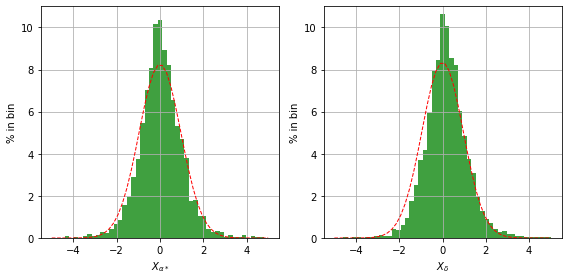

In [12]:
from scipy import stats

# Calculate the stadard deviation of the difference
std_ra = np.std(X_a[(-5<=X_a) &(X_a<=5)])
std_dec = np.std(X_d[(-5<=X_d) &(X_d<=5)])

print("The standard deviation of normalized differences is: ")
print("R.A.  {}".format(std_ra))
print("Decl. {}".format(std_dec))

# Normalized difference in RA and decl.

bins_array = np.linspace(-5, 5, 50)
weights = np.ones_like(dRA) * 100. / dRA.size

# Plot the 
fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)
ax0.hist(X_a, bins_array, weights=weights, facecolor="g", alpha=0.75)
ax1.hist(X_d, bins_array, weights=weights, facecolor="g", alpha=0.75)

ax0.set_xlabel("$X_{\\alpha*}$")
ax1.set_xlabel("$X_{\\delta}$")

ax0.set_ylim([0, 11])
ax1.set_ylim([0, 11])

ax0.set_ylabel("% in bin")
ax1.set_ylabel("% in bin")

# add a '(standard) Gaussian distribution' line
Gaussian_dist = stats.norm.pdf(bins_array, 0, 1) * 10. / 50
Gaussian_dist_ra = stats.norm.pdf(bins_array, 0, std_ra) * 10. / 50
Gaussian_dist_dec = stats.norm.pdf(bins_array, 0, std_dec) * 10. / 50
ax0.plot(bins_array, Gaussian_dist_ra * 100, "r--", linewidth=1)
ax1.plot(bins_array, Gaussian_dist_dec * 100, "r--", linewidth=1)
# ax0.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)
# ax1.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)

ax0.set_yticks(np.arange(0, 12, 2))
ax1.set_yticks(np.arange(0, 12, 2))

fig.tight_layout()

ax0.grid()
ax1.grid()

# plt.show()

# plt.savefig("../plots/icrf3_sx_icrf2_nor_off.png")

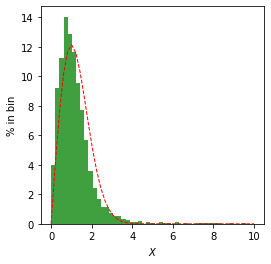

In [13]:
# Distribution of normalized separation
from scipy import stats

bins_array = np.linspace(0, 10, 50)
weights = np.ones_like(X) * 100. / X.size

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(X, bins_array, weights=weights, facecolor="g", alpha=0.75)

# add a '(standard) Rayleigh distribution' line
rayleigh_dist = stats.rayleigh.pdf(bins_array) * 10. / 50  * 100
ax.plot(bins_array, rayleigh_dist, "r--", linewidth=1)

ax.set_xlabel("$X$")
ax.set_ylabel("% in bin")

plt.show()

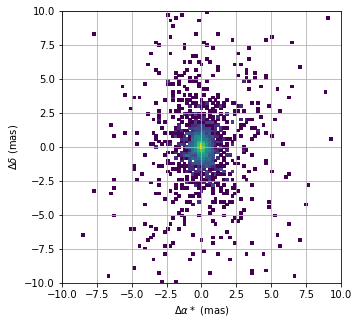

In [14]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(5, 5))

bins = np.linspace(-10, 10, 100)

# We can increase the number of bins on each axis
ax.hist2d(dRA, dDC, bins, norm=colors.LogNorm())

ax.set_xlabel("$\Delta\\alpha*$ (mas)")
ax.set_ylabel("$\Delta\\delta$ (mas)")

ax.grid(True)



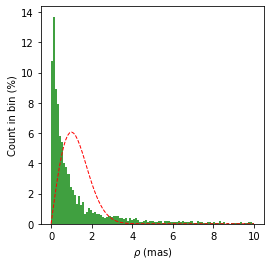

In [15]:
# Distribution of angular separation
bins_array = np.linspace(0, 10, 100)

weights = np.ones_like(X) * 100. / X.size

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(ang_sep, bins_array, weights=weights, facecolor="g", alpha=0.75)

# add a '(standard) Rayleigh distribution' line
rayleigh_dist = stats.rayleigh.pdf(bins_array) * 10. / 100 * 100
ax.plot(bins_array, rayleigh_dist, "r--", linewidth=1)

ax.set_xlabel("$\\rho$ (mas)")
ax.set_ylabel("Count in bin (%)")

plt.show()

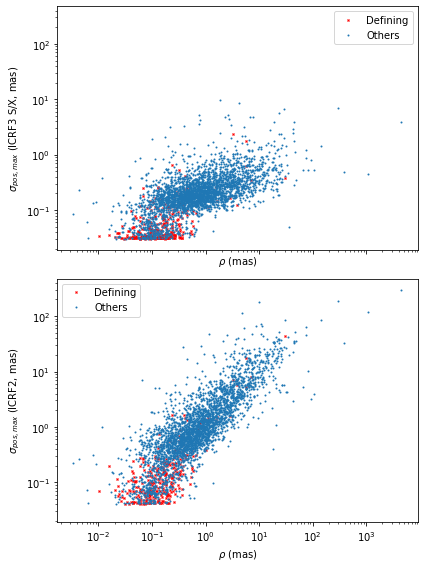

In [16]:
# Angular position difference vs. positional uncertainty
fig, (ax0, ax1) = plt.subplots(figsize=(6, 8), nrows=2, sharex=True, sharey=True)

ax0.plot(com_def["ang_sep"],
         com_def["pos_err_icrf3sx"], "rx", ms=2, label="Defining")
ax1.plot(com_def["ang_sep"],
         com_def["pos_err_icrf2"], "rx", ms=2, label="Defining")

ax0.plot(com_oth["ang_sep"],
         com_oth["pos_err_icrf3sx"], ".", ms=2, label="Others")
ax1.plot(com_oth["ang_sep"], com_oth["pos_err_icrf2"],
         ".", ms=2, label="Others")

ax0.set_xscale("log")
ax0.set_yscale("log")
ax1.set_xscale("log")
ax1.set_yscale("log")


ax0.set_xlabel("$\\rho$ (mas)")
ax0.set_ylabel("$\sigma_{pos,max}$ (ICRF3 S/X, mas)")
ax1.set_xlabel("$\\rho$ (mas)")
ax1.set_ylabel("$\sigma_{pos,max}$ (ICRF2, mas)")


ax0.legend()
ax1.legend()

fig.tight_layout()
plt.show()

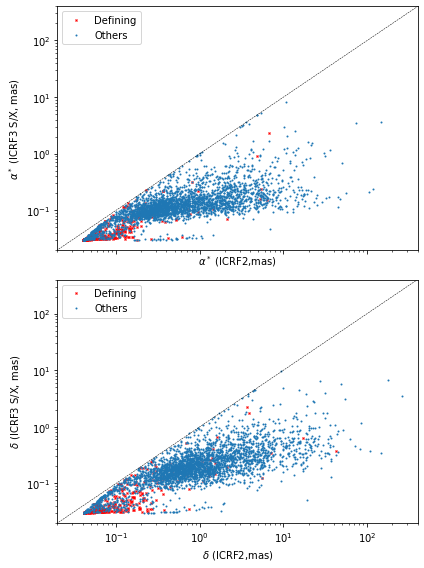

In [17]:
# positional uncertainty (ICRF3 vs. ICRF2)
fig, (ax0, ax1) = plt.subplots(
    figsize=(6, 8), nrows=2, sharex=True, sharey=True)

ax0.plot(com_def["ra_err_icrf2"],
         com_def["ra_err_icrf3sx"], "rx", ms=2, label="Defining")
ax1.plot(com_def["dec_err_icrf2"],
         com_def["dec_err_icrf3sx"], "rx", ms=2, label="Defining")

ax0.plot(com_oth["ra_err_icrf2"],
         com_oth["ra_err_icrf3sx"], ".", ms=2, label="Others")
ax1.plot(com_oth["dec_err_icrf2"],
         com_oth["dec_err_icrf3sx"], ".", ms=2, label="Others")

# Plot a line of "y=x"
x = np.linspace(0.01, 400, 100)
ax0.plot(x, x, "k--", lw=0.5)
ax1.plot(x, x, "k--", lw=0.5)

ax0.set_xscale("log")
ax0.set_yscale("log")
ax1.set_xscale("log")
ax1.set_yscale("log")

ax0.set_xlabel("$\\alpha^*$ (ICRF2,mas)")
ax0.set_ylabel("$\\alpha^*$ (ICRF3 S/X, mas)")
ax1.set_xlabel("$\\delta$ (ICRF2,mas)")
ax1.set_ylabel("$\\delta$ (ICRF3 S/X, mas)")

ax0.set_xlim([0.02, 400])
ax0.set_ylim([0.02, 400])

ax0.legend()
ax1.legend()

fig.tight_layout()


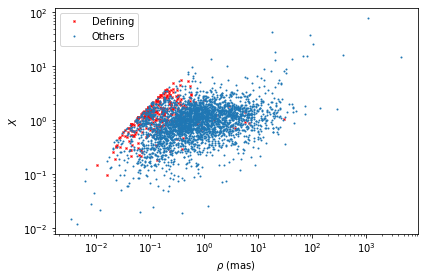

In [18]:
# Angular separation vs. normalized separation
fig, ax = plt.subplots()

ax.plot(com_def["ang_sep"],
         com_def["nor_sep"], "rx", ms=2, label="Defining")
ax.plot(com_oth["ang_sep"],
         com_oth["nor_sep"], ".", ms=2, label="Others")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("$\\rho$ (mas)")
ax.set_ylabel("$X$")

ax.legend()

fig.tight_layout()
plt.show()

Then I investigate the systematics through the 16-parameters transformation.

In [19]:
# Try with all the sources
# Transform columns into np.array
dra = np.array(com_sou["dra"])
ddec = np.array(com_sou["ddec"])
dra_err = np.array(com_sou["dra_err"])
ddec_err = np.array(com_sou["ddec_err"])
ra_rad = np.array(com_sou["ra_icrf3sx"].to(u.radian))
dec_rad = np.array(com_sou["dec_icrf3sx"].to(u.radian))
dra_ddec_cov = np.array(com_sou["dra_ddec_cov"])

# Transformation parameters
# l_max = 1
w1_all, sig1_all, corrcoef1_all, _, _, _ = vsh_deg01_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# l_max = 2
w2_all, sig2_all, corrcoef2_all, _, _, _ = vsh_deg02_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# mas -> uas
w1 = w1_all * 1.e3
sig1 = sig1_all * 1.e3
w2 = w2_all * 1.e3
sig2 = sig2_all * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "               Rotation [uas]                 "
      "                  Glide [uas]               \n"
      "               x             y             z"
      "               x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "l_max=1  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "l_max=2  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra.size, w1[3], sig1[3], w1[4], sig1[4], w1[5], sig1[5],
       w1[0], sig1[0], w1[1], sig1[1], w1[2], sig1[2],
       w2[3], sig2[3], w2[4], sig2[4], w2[5], sig2[5],
       w2[0], sig2[0], w2[1], sig2[1], w2[2], sig2[2]))

quad_names = Column(["ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])
t_quad = Table([quad_names, w2[6:], sig2[6:]], names=["Quadrupolar term", "Estimate", "Error"])
t_quad["Estimate"].format = "%5.0f"
t_quad["Error"].format = "%5.0f"
print(t_quad)

print("Correlation coefficient between parameters in 'l_max=1' fit")
print_vsh1_corr(corrcoef1_all, deci_digit=1, included_one=False)

print("Correlation coefficient between parameters in 'l_max=2' fit")
print_vsh2_corr(corrcoef2_all, deci_digit=1, included_one=False)

Estimates (  3410 sources)
--------------------------------------------------------------------------------------------
               Rotation [uas]                                   Glide [uas]               
               x             y             z               x             y             z
--------------------------------------------------------------------------------------------
l_max=1    +7 +/-   7   +11 +/-   7    +3 +/-   5     +17 +/-   6   +61 +/-   6   +80 +/-   7
l_max=2   +10 +/-   8   +12 +/-   7    +3 +/-   6     +21 +/-   7   +63 +/-   7   +97 +/-   7
--------------------------------------------------------------------------------------------

Quadrupolar term Estimate Error
---------------- -------- -----
            ER22       -0     4
            EI22       -1     4
            ER21        7     9
            EI21       -7     9
             E20      -52     8
            MR22       -0     4
            MI22       -1     4
            MR21        2     8
     

In [20]:
# Remove the outlier (consider the normalized separation)
N = len(com_sou)
X0 = np.sqrt(np.log(N) * 2)
# X0 = 3.41

print("There are %d sources.\n"
      "When X >= %.2f, the number of the outlier is smaller than 1." % (N, X0))

mask = ((com_sou["nor_sep"] <= X0)
        & (com_sou["ang_sep"] < 10)
        & (com_sou["pos_err_icrf3sx"] < 10)
        & (com_sou["pos_err_icrf2"] < 10))

# Table of a clean sample
com_clean = com_sou[mask]

print("After elimination, there are %d sources in the clean sample." % len(com_clean))

There are 3410 sources.
When X >= 4.03, the number of the outlier is smaller than 1.
After elimination, there are 3134 sources in the clean sample.


In [21]:
# Transform columns into np.array
dra = np.array(com_clean["dra"])
ddec = np.array(com_clean["ddec"])
dra_err = np.array(com_clean["dra_err"])
ddec_err = np.array(com_clean["ddec_err"])
ra_rad = np.array(com_clean["ra_icrf3sx"].to(u.radian))
dec_rad = np.array(com_clean["dec_icrf3sx"].to(u.radian))
dra_ddec_cov = np.array(com_clean["dra_ddec_cov"])

In [22]:
# Transformation parameters
# l_max = 1
w1_cln, sig1_cln, corrcoef1_cln, _, _, _ = vsh_deg01_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# l_max = 2
w2_cln, sig2_cln, corrcoef2_cln, _, _, _ = vsh_deg02_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# mas -> uas
w1 = w1_cln * 1.e3
sig1 = sig1_cln * 1.e3
w2 = w2_cln * 1.e3
sig2 = sig2_cln * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "               Rotation [uas]                 "
      "                  Glide [uas]               \n"
      "               x             y             z"
      "               x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "l_max=1  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "l_max=2  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra.size, w1[3], sig1[3], w1[4], sig1[4], w1[5], sig1[5],
       w1[0], sig1[0], w1[1], sig1[1], w1[2], sig1[2],
       w2[3], sig2[3], w2[4], sig2[4], w2[5], sig2[5],
       w2[0], sig2[0], w2[1], sig2[1], w2[2], sig2[2]))

quad_names = Column(["ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])
t_quad = Table([quad_names, w2[6:], sig2[6:]], names=["Quadrupolar term", "Estimate", "Error"])
t_quad["Estimate"].format = "%5.0f"
t_quad["Error"].format = "%5.0f"
print(t_quad)

print("Correlation coefficient between parameters in 'l_max=1' fit")
print_vsh1_corr(corrcoef1_cln, deci_digit=1, included_one=False)

print("Correlation coefficient between parameters in 'l_max=2' fit")
print_vsh2_corr(corrcoef2_cln, deci_digit=1, included_one=False)

Estimates (  3134 sources)
--------------------------------------------------------------------------------------------
               Rotation [uas]                                   Glide [uas]               
               x             y             z               x             y             z
--------------------------------------------------------------------------------------------
l_max=1    +9 +/-   4   +14 +/-   4    -2 +/-   3     +18 +/-   3   +61 +/-   3   +75 +/-   4
l_max=2   +11 +/-   4   +14 +/-   4    -1 +/-   3     +22 +/-   4   +63 +/-   4   +89 +/-   4
--------------------------------------------------------------------------------------------

Quadrupolar term Estimate Error
---------------- -------- -----
            ER22       -0     2
            EI22       -2     2
            ER21       13     4
            EI21       -4     5
             E20      -43     4
            MR22        2     2
            MI22       -0     2
            MR21        0     4
     

Then I check the residuals of positional offsets.

In [23]:
# Remove the systematics
RA = np.array(com_sou["ra_icrf3sx"].to(u.radian))
DE = np.array(com_sou["dec_icrf3sx"].to(u.radian))

# dra_ns, ddec_ns = residual_calc02(dRA, dDC, RA, DE, w2_cln)
dra_ns, ddec_ns = residual_calc02(dRA, dDC, RA, DE, w2_all)

# Now re-calculate the normalized difference
ang_sep_ns, Xa_ns, Xd_ns, X_ns = nor_sep(
    dra_ns, dRA_err, ddec_ns, dDC_err, dRA_dDC_cov/dRA_err/dDC_err)

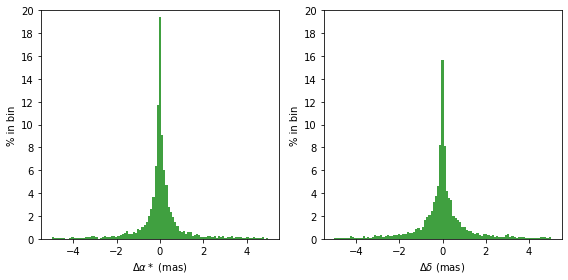

In [24]:
# Difference in RA and decl.
bins_array = np.linspace(-5, 5, 100)
weights = np.ones_like(dra_ns) * 100. / dra_ns.size

fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)
ax0.hist(dra_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)
ax1.hist(ddec_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)

ax0.set_yticks(np.arange(0, 21, 2))
ax1.set_yticks(np.arange(0, 21, 2))

ax0.set_ylim([0, 20])
ax1.set_ylim([0, 20])

ax0.set_xlabel("$\Delta\\alpha*$ (mas)")
ax1.set_xlabel("$\Delta\\delta$ (mas)")

ax0.set_ylabel("% in bin")
ax1.set_ylabel("% in bin")

fig.tight_layout()
plt.show()

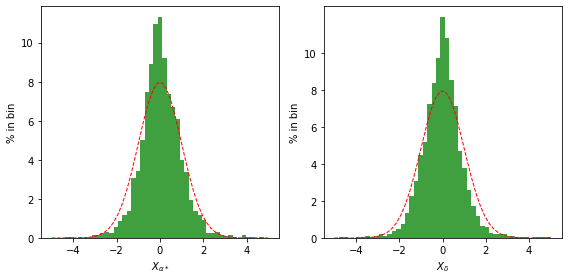

In [25]:
# Normalized difference in RA and decl.
from scipy import stats
bins_array = np.linspace(-5, 5, 50)
weights = np.ones_like(Xa_ns) * 100. / Xa_ns.size

# Plot the 
fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)
ax0.hist(Xa_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)
ax1.hist(Xd_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)

ax0.set_xlabel("$X_{\\alpha*}$")
ax1.set_xlabel("$X_{\\delta}$")

ax0.set_ylabel("% in bin")
ax1.set_ylabel("% in bin")

# add a '(standard) Gaussian distribution' line
Gaussian_dist = stats.norm.pdf(bins_array, 0, 1) * 10. / 50
ax0.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)
ax1.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)

ax0.set_yticks(np.arange(0, 11, 2))
ax1.set_yticks(np.arange(0, 11, 2))

fig.tight_layout()
plt.show()

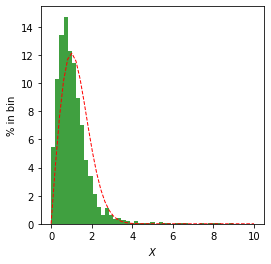

In [26]:
# Distribution of normalized separation
from scipy import stats

bins_array = np.linspace(0, 10, 50)
weights = np.ones_like(X_ns) * 100. / X_ns.size

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(X_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)

# add a '(standard) Rayleigh distribution' line
rayleigh_dist = stats.rayleigh.pdf(bins_array) * 10. / 50  * 100
ax.plot(bins_array, rayleigh_dist, "r--", linewidth=1)

ax.set_xlabel("$X$")
ax.set_ylabel("% in bin")

plt.show()

The last step is to save the 16 transformation parameters for further use.

In [27]:
vsh2_names = Column(["D1", "D2", "D3",
                     "R1", "R2", "R3",
                     "ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])
t_vsh2 = Table([vsh2_names, w2, sig2], names=[
               "Names", "Estimate", "Error"])
t_vsh2["Estimate"].format = "%5.0f"
t_vsh2["Error"].format = "%5.0f"
t_vsh2["Estimate"].unit = u.uas
t_vsh2["Error"].unit = u.uas
t_vsh2.write("../logs/icrf3sx_icrf2_vsh02.log", format="ascii", overwrite=True)

In [29]:
maskdef2 = (icrf2["type"] == "D")
maskdef3 = (icrf3sx["type"] == "D")

icrf2def = icrf2[maskdef2]
icrf3def = icrf3sx[maskdef3]

In [30]:
from my_progs.catalog.pos_diff import radio_cat_diff_calc

# Calculate the positional difference
defdif = radio_cat_diff_calc(icrf2def, icrf3def, sou_name="iers_name")

In [31]:
defdif

iers_name,ra_err_1,dec_err_1,pos_err_1,ra,dec,ra_err_2,dec_err_2,pos_err_2,dra,ddec,dra_err,ddec_err,dra_ddec_cov,ang_sep,nor_ra,nor_dec,nor_sep
,mas,mas,mas,deg,deg,mas,mas,,mas,mas,mas,mas,,mas,,,
str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0002-478,0.13744223404595796,0.21389999999999998,0.2232677786078054,1.1485645219166665,-47.60544555705556,0.06624331361080132,0.10759999999999999,0.1092520311826254,0.187908513946743,0.2155000146331076,0.15257307854822508,0.23943886484862892,0.012904155320932122,0.2859193346392351,1.2315967910901735,0.900021033633553,1.3281054217238792
0007+106,0.07230300068359731,0.09299999999999999,0.09519151082122687,2.6291912672083333,10.974862305027777,0.03607787203439982,0.0385,0.039351348789675895,-0.03342725563030885,0.08460000060495075,0.08080431150862435,0.10065411069598697,-0.0013853482074416173,0.0909645069317241,-0.4136815846360019,0.840502191316104,0.8842005698355653
0010+405,0.05468097813122239,0.0683,0.06937391380757128,3.379709162875,40.86031781594445,0.03437414184945987,0.038,0.03916304128120122,0.04821455576132679,-0.03339999636864376,0.06458785487438029,0.07815938843158894,-0.0006969009889014226,0.05865324496298143,0.7464956972963627,-0.42733185403411883,0.8151409194990272
0013-005,0.06524936157003586,0.10049999999999999,0.10238056907077328,4.0462022934999995,-0.25345705902777776,0.044699562638714926,0.05879999999999999,0.059214143132657604,0.06524936217257606,0.07119999989591007,0.07909190910194083,0.11643749396135249,-0.0018125337283303815,0.09657597656304384,0.8249815045996267,0.6114868799868066,1.141744788723145
0016+731,0.04223709371978185,0.04239999999999999,0.043366734659933674,4.940776551249999,73.45833822277778,0.030364583978924223,0.030399999999999996,0.03100061228280447,0.20114935404127682,-0.16239998785749774,0.05201903542076474,0.052172023154177176,-0.00012748136449256458,0.25852430966417517,3.866841290197835,-3.112779187756975,4.8541794320561396
0048-097,0.04112993631466134,0.04279999999999999,0.04300592857755271,12.672155758999999,-9.4847806505,0.030625528117379446,0.0313,0.03180174950258958,0.07989268234822505,0.07299999964516245,0.05127957325989069,0.05302386255262813,-0.00010102736344074617,0.10822125780542428,1.557982589740361,1.3767386254199658,2.1185626140017124
0059+581,0.04110308664288924,0.04139999999999999,0.04148882052426852,15.690676555833331,58.40309350455556,0.030257530316594963,0.030299999999999997,0.030689832347205622,0.0713606195083315,-0.015499998085033438,0.05103902303563934,0.05130350865194309,-9.713716419443663e-06,0.07302457091451413,1.398158022313673,-0.3021235485118499,1.429341999926622
0104-408,0.042840698212707494,0.0455,0.04554470264517753,16.687949851625,-40.572211214805556,0.031105081396457564,0.0319,0.03192067506710074,0.04694246618898637,0.1441999927465076,0.05294196362086062,0.05556851626595765,2.2952335897510988e-05,0.15164838620966914,0.8866778445386132,2.5949944759429777,2.735826484359926


In [34]:
# Try with all the sources
# Transform columns into np.array
dra = np.array(defdif["dra"])
ddec = np.array(defdif["ddec"])
dra_err = np.array(defdif["dra_err"])
ddec_err = np.array(defdif["ddec_err"])
ra_rad = np.array(defdif["ra"].to(u.radian))
dec_rad = np.array(defdif["dec"].to(u.radian))
dra_ddec_cov = np.array(defdif["dra_ddec_cov"])

# Transformation parameters
# l_max = 1
w1_all, sig1_all, corrcoef1_all, _, _, _ = vsh_deg01_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# l_max = 2
w2_all, sig2_all, corrcoef2_all, _, _, _ = vsh_deg02_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# mas -> uas
w1 = w1_all * 1.e3
sig1 = sig1_all * 1.e3
w2 = w2_all * 1.e3
sig2 = sig2_all * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "               Rotation [uas]                 "
      "                  Glide [uas]               \n"
      "               x             y             z"
      "               x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "l_max=1  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "l_max=2  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra.size, w1[3], sig1[3], w1[4], sig1[4], w1[5], sig1[5],
       w1[0], sig1[0], w1[1], sig1[1], w1[2], sig1[2],
       w2[3], sig2[3], w2[4], sig2[4], w2[5], sig2[5],
       w2[0], sig2[0], w2[1], sig2[1], w2[2], sig2[2]))

quad_names = Column(["ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])
t_quad = Table([quad_names, w2[6:], sig2[6:]], names=["Quadrupolar term", "Estimate", "Error"])
t_quad["Estimate"].format = "%5.0f"
t_quad["Error"].format = "%5.0f"
print(t_quad)

print("Correlation coefficient between parameters in 'l_max=1' fit")
print_vsh1_corr(corrcoef1_all, deci_digit=1, included_one=False)

print("Correlation coefficient between parameters in 'l_max=2' fit")
print_vsh2_corr(corrcoef2_all, deci_digit=1, included_one=False)

Estimates (   165 sources)
--------------------------------------------------------------------------------------------
               Rotation [uas]                                   Glide [uas]               
               x             y             z               x             y             z
--------------------------------------------------------------------------------------------
l_max=1   +12 +/-   7   +18 +/-   7    -4 +/-   6     +21 +/-   7   +70 +/-   7   +86 +/-   7
l_max=2   +18 +/-   7   +16 +/-   7    -4 +/-   6     +24 +/-   6   +71 +/-   7   +97 +/-   7
--------------------------------------------------------------------------------------------

Quadrupolar term Estimate Error
---------------- -------- -----
            ER22        3     4
            EI22       -3     4
            ER21       12     9
            EI21        4     8
             E20      -59     8
            MR22        2     4
            MI22        1     4
            MR21        6     8
     